In [2]:
import sys
sys.path.append('../')
#import functions
#exec(open('./functions.py').read())
%run functions.py
import demoji
#demoji.download_codes()

C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e|destroy|proxy)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [4]:
#load labelled data (generated in file 2.preprocessing_en)
data = pickle.load(open('data_n_models/de_df_labelled.pkl', "rb"))
data.head()
#filter out bot related data
data = classify_bots(data)
data = data[data['bot']==False]
data = data.drop_duplicates(subset=['lemma'])
data.head()

C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False


In [5]:
# change compound from continous to categorical variable
data["compound"] = np.where(data["compound"] >= 0.5, 1, data["compound"])
data["compound"] = np.where(data["compound"] <= -0.5, -1, data["compound"])
data["compound"] = np.where((data["compound"] > -0.5) & (data["compound"] < 0.5), 0, data["compound"])

In [6]:
shuffled_df = data.sample(frac=1, random_state= 42) # shuffle data for random tweets to look at

In [7]:
 # filter out 500 first tweets from shuffled data
 shuffled_df.iloc[0:500]#.to_csv('data_n_models/de_vader_eval.csv')

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
2274,104,1364996553581219842,1393,yasminnn2903,@bxrxak hä zum Beispiel wie ASOS oder so kenns...,0,aus deiner mutter,07-Apr-2021,227,False,1.0,1.379782e+18,asos,de,zum beispiel wie asos oder kennst nicht oder wie,zum Beispiel wie ASOS oder kennst nicht oder wie,0.0,zum beispiel wie asos oder kennen nicht oder wie,False
57,79,1358102479657967618,3586,localbunnybitch,@whosmartinn Achsooooo ja hm\nAlso bei vinted ...,0,she/her,01-Mar-2021,207,False,2.0,1.366471e+18,asos,de,achsooooo hmalso bei vinted sind immer ganz ni...,Achsooooo hmAlso bei vinted sind immer ganz ni...,1.0,achsooooo hmalso bei vinted sein immer ganz ni...,False
2673,256,1027214204,67514,JudicatorPredo,"@undalles0yeah @isi_peazy Weiß gar nicht, ob Z...",0,Mitte des Flusses,12-Apr-2021,314,False,1.0,1.381686e+18,zalando,de,weiß gar nicht zalando überhaupt schwarze zahl...,"Weiß gar nicht, Zalando überhaupt schwarze Zah...",0.0,weiß gar nicht zalando überhaupt schwarze zahl...,False
1400,21,1233373817407496192,26199,ButterflyAbuse,@the_fesxh @OlliL @Zalando Geht nich,0,"Rostock, Deutschland",24-Mar-2021,10895,False,3.0,1.374828e+18,zalando,de,geht nich,Geht nich,0.0,gehen nich,False
1737,16,1360904902202056707,54,Selinasahar,Was sich wohl die Leute bei der Bank denken di...,0,,31-Mar-2021,8,False,0.0,NaN,zalando,de,sich wohl die leute bei der bank denken die je...,Was sich wohl die Leute bei der Bank denken di...,-1.0,sich wohl der leute bei der bank denken der je...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,61,1289565265,610555,Ratings_via_FL,▶ dpa-AFX: Berenberg hebt Ziel für Asos auf 70...,0,37574,09-Apr-2021,488,False,0.0,NaN,asos,de,dpa afx berenberg hebt ziel für asos auf pence...,dpa-AFX: Berenberg hebt Ziel für Asos auf Penc...,-1.0,dpa afx berenberg heben ziel für asos auf penc...,False
419,21,44144586,172342,godmodetrader,"#Zalando - Das war knapp, das war richtig knap...",0,"München, Deutschland",10-Mar-2021,9278,False,2.0,NaN,zalando,de,zalando das war knapp das war richtig knapp bö...,"Zalando Das war knapp, das war richtig knapp b...",-1.0,zalando der sein knapp der sein richtig knapp ...,False
702,38,1289565265,605853,Ratings_via_FL,▶ RBC belässt Zalando auf 'Outperform' - Ziel ...,0,37574,16-Mar-2021,493,False,0.0,NaN,zalando,de,rbc belässt zalando auf outperform ziel euro n...,RBC belässt Zalando auf 'Outperform' Ziel Euro...,-1.0,rbc belässt zalando auf outperform ziel euro n...,False
1203,12,713431689767297026,244,timbabst,@levisimp666 Leider hast du nicht bei Zalando ...,0,,24-Mar-2021,41,False,0.0,1.374488e+18,zalando,de,leider hast nicht bei zalando mitgemacht hätte...,Leider hast nicht bei Zalando mitgemacht ..da ...,0.0,leider haben nicht bei zalando mitmachen haben...,False


In [8]:
# manually labelled data in Excel and imported it again to our Github for further usage.
# deleted compound so that the vader sentiment will not influence the manual labelling

df = pd.read_csv('data_n_models/de_man_labelled_data_new.csv', sep = ';').drop('index', axis= 1) # drop everything except Sentiment and index for merging with original shuffled data again

In [9]:
df.head()

,Unnamed: 0,Sentiment
0,2087,-1
1,287,0
2,2127,0
3,94,0
4,250,1


In [10]:
shuffled_df[shuffled_df.index == 2087] 

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
2087,1,1200528183164067841,25959,ToskaBoy,@FriedhofchiIIer Boohoo soll doch in Rente gehen,0,,08-Apr-2021,251,False,3.0,1.380103e+18,boohoo,de,boohoo soll doch rente gehen,Boohoo soll doch Rente gehen,0.0,boohoo soll doch rente gehen,False


In [11]:
# inner merge for only data with vader and manual sentiment, merging on indexes

merged_df = pd.merge(shuffled_df, df, right_on='Unnamed: 0', left_index=True, how = 'inner') # Unnamed is here the old index for some reason

In [12]:
merged_df = merged_df.drop(['Unnamed: 0'], axis = 1) # afterwards we can drop it, as we have the original index from the left dataset

In [13]:
merged_df = merged_df.drop('index', axis = 1).reset_index().drop('index', axis = 1).reset_index() # same for the index and we can reset everything

In [14]:
merged_df.Sentiment = merged_df.Sentiment.astype('float64') # changing Sentiment to float

In [15]:
merged_df.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,Sentiment
0,0,1358102479657967618,3586,localbunnybitch,@whosmartinn Achsooooo ja hm\nAlso bei vinted ...,0,she/her,01-Mar-2021,207,False,2.0,1.366471e+18,asos,de,achsooooo hmalso bei vinted sind immer ganz ni...,Achsooooo hmAlso bei vinted sind immer ganz ni...,1.0,achsooooo hmalso bei vinted sein immer ganz ni...,False,1.0
1,1,1027214204,67514,JudicatorPredo,"@undalles0yeah @isi_peazy Weiß gar nicht, ob Z...",0,Mitte des Flusses,12-Apr-2021,314,False,1.0,1.381686e+18,zalando,de,weiß gar nicht zalando überhaupt schwarze zahl...,"Weiß gar nicht, Zalando überhaupt schwarze Zah...",0.0,weiß gar nicht zalando überhaupt schwarze zahl...,False,0.0
2,2,33618241,7969,cyclist_city,@Zalando_Press @Vizions2017 Super! Warum nicht...,0,"Berlin, Germany",02-Mar-2021,1223,False,3.0,NaN,zalando,de,super warum nicht eurer heimat berlin,Super! Warum nicht eurer Heimat Berlin?,1.0,super warum nicht eurer heimat berlin,False,1.0
3,3,23059415,14583,birgitzz,"Von wegen, Umsatzeinbruch während Corona --&gt...",2,"Zurich, Switzerland",15-Mar-2021,1280,False,2.0,NaN,zalando,de,von wegen umsatzeinbruch während corona zaland...,"Von wegen, Umsatzeinbruch während Corona --&gt...",0.0,von wegen umsatzeinbruch während corona zaland...,False,1.0
4,4,1250097593612472322,1868,zItzMatze,"@aycaxkaya asos, die hatten da zwei übelst nic...",0,bei mir zu hause,04-Apr-2021,31,False,1.0,1.378645e+18,asos,de,asos die hatten zwei übelst nice tshirts,"asos, die hatten zwei übelst nice tshirts",0.0,asos der haben zwei übelst nice tshirts,False,1.0


In [16]:
# column 'compound' from vader -> predicted values
# column 'Sentiment' own labelled data -> true values
# in order to determine the correctness of vader's sentiment evaluation we can use the confusion matrix to determine the false postives and negatives.

con_mat = pd.crosstab(merged_df.compound, merged_df.Sentiment, rownames=['compound'], colnames=['Sentiment'])
print(con_mat)

Sentiment  -1.0   0.0   1.0
compound                   
-1.0         33    20    14
 0.0         29    68    32
 1.0          1     1     7


True Positive (TP) 

    The predicted value matches the actual value
    The actual value was positive and the model predicted a positive value

True Negative (TN) 

    The predicted value matches the actual value
    The actual value was negative and the model predicted a negative value

False Positive (FP) – Type 1 error

    The predicted value was falsely predicted
    The actual value was negative but the model predicted a positive value
    Also known as the Type 1 error

False Negative (FN) – Type 2 error

    The predicted value was falsely predicted
    The actual value was positive but the model predicted a negative value
    Also known as the Type 2 error


In [17]:
from sklearn.metrics import multilabel_confusion_matrix

In [18]:
print(multilabel_confusion_matrix(merged_df.compound, merged_df.Sentiment))

[[[108  30]
  [ 34  33]]

 [[ 55  21]
  [ 61  68]]

 [[150  46]
  [  2   7]]]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sentiment', ylabel='compound'>

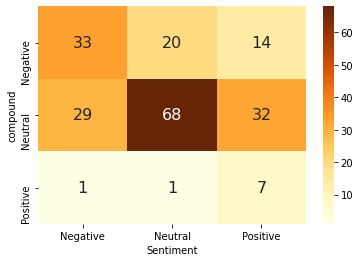

In [20]:
cm = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, xticklabels = ['Negative', 'Neutral','Positive'], yticklabels = ['Negative', 'Neutral','Positive'], cmap = cm)


In [21]:
#classification_report
# wordclouds zalando, asos and boohoo englisch nouns -> done
# add colorscheme for every plot -> done
#  add screenshot of excel -> done
# look up how tags work
# look up how vader works


In [23]:
print(classification_report(merged_df.compound, merged_df.Sentiment))

              precision    recall  f1-score   support

        -1.0       0.52      0.49      0.51        67
         0.0       0.76      0.53      0.62       129
         1.0       0.13      0.78      0.23         9

    accuracy                           0.53       205
   macro avg       0.47      0.60      0.45       205
weighted avg       0.66      0.53      0.57       205

